In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='wood.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('wood.zip')
f.keys()
!unzip "wood.zip"

Streaming output truncated to the last 5000 lines.
  inflating: wood/train/Akashmoni/727.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._727.jpg  
  inflating: wood/train/Akashmoni/733.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._733.jpg  
  inflating: wood/train/Akashmoni/900.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._900.jpg  
  inflating: wood/train/Akashmoni/243.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._243.jpg  
  inflating: wood/train/Akashmoni/525.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._525.jpg  
  inflating: wood/train/Akashmoni/531.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._531.jpg  
  inflating: wood/train/Akashmoni/257.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._257.jpg  
  inflating: wood/train/Akashmoni/519.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._519.jpg  
  inflating: wood/train/Akashmoni/280.jpg  
  inflating: __MACOSX/wood/train/Akashmoni/._280.jpg  
  inflating: wood/train/Akashmoni/1066.jpg  
  inflating: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

# Define the batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # Change this to your desired image size

# Directory where your dataset is located (replace with your actual path)
dataset_directory = '/content/wood/train'
test_dataset = '/content/wood/test'

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
nb_classes = 7

In [ ]:
# Define the number of classes
nb_classes = 7  # Change this to the number of classes in your dataset

# Create a training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # Specify the validation split here
    subset="training",
    seed=66  # This creates the training dataset
)
# Create a validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # Specify the validation split here
    subset="validation",
    seed=66  # This creates the validation dataset
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dataset,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 7000 files belonging to 7 classes.
Using 5600 files for training.
Found 7000 files belonging to 7 classes.
Using 1400 files for validation.
Found 175 files belonging to 7 classes.


In [ ]:
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional Layer 2
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional Layer 3
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(nb_classes, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                        

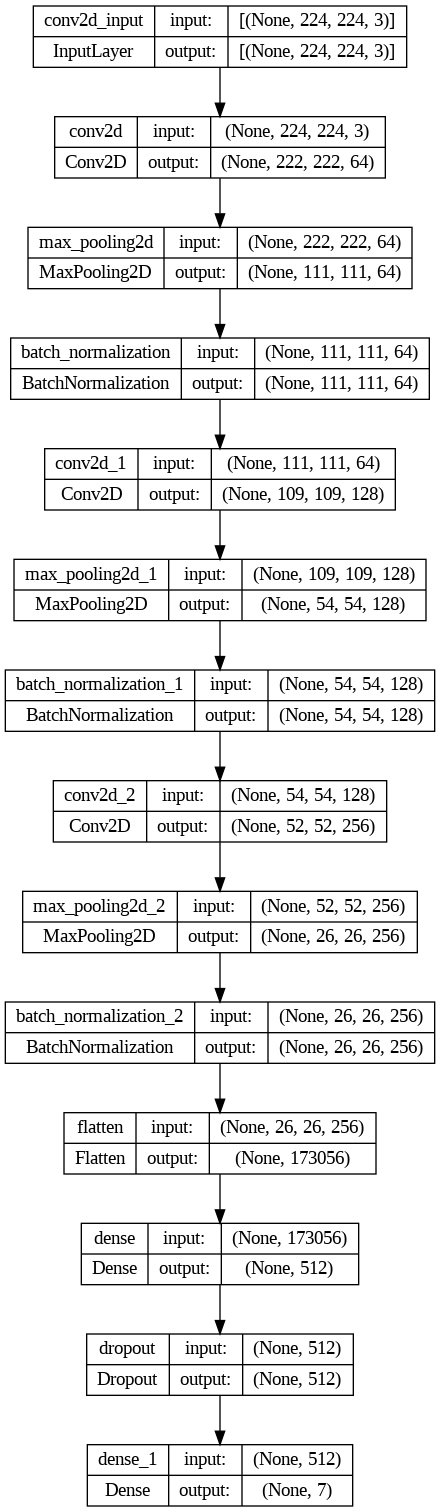

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Assuming your model is already defined and compiled

# Generate a summary plot and save it to a file (optional)
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

# Display the summary plot
#plt.figure(figsize=(10, 6))
#img = plt.imread('model_summary.png')
#plt.imshow(img)
#plt.axis('off')
#plt.show()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

# Evaluate the model on the test dataset
scores = model.evaluate(test_dataset)


Epoch 1/100
175/175 [==============================] - 38s 140ms/step - loss: 2.6298 - accuracy: 0.7684 - val_loss: 1.3021 - val_accuracy: 0.7893
Epoch 2/100
175/175 [==============================] - 24s 138ms/step - loss: 0.7510 - accuracy: 0.8975 - val_loss: 0.4614 - val_accuracy: 0.9171
Epoch 3/100
175/175 [==============================] - 26s 145ms/step - loss: 0.5157 - accuracy: 0.9250 - val_loss: 1.0486 - val_accuracy: 0.8471
Epoch 4/100
175/175 [==============================] - 26s 147ms/step - loss: 0.3319 - accuracy: 0.9398 - val_loss: 0.4781 - val_accuracy: 0.9257
Epoch 5/100
175/175 [==============================] - 25s 144ms/step - loss: 0.2631 - accuracy: 0.9514 - val_loss: 0.7418 - val_accuracy: 0.9071
Epoch 6/100
175/175 [==============================] - 25s 144ms/step - loss: 0.2956 - accuracy: 0.9511 - val_loss: 0.5846 - val_accuracy: 0.9293
Epoch 7/100
175/175 [==============================] - 25s 143ms/step - loss: 0.2885 - accuracy: 0.9570 - val_loss: 0.5635 -

In [ ]:
scores = model.evaluate(test_dataset)

6/6 [==============================] - 1s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1/1 [==============================] - 0s 20ms/step


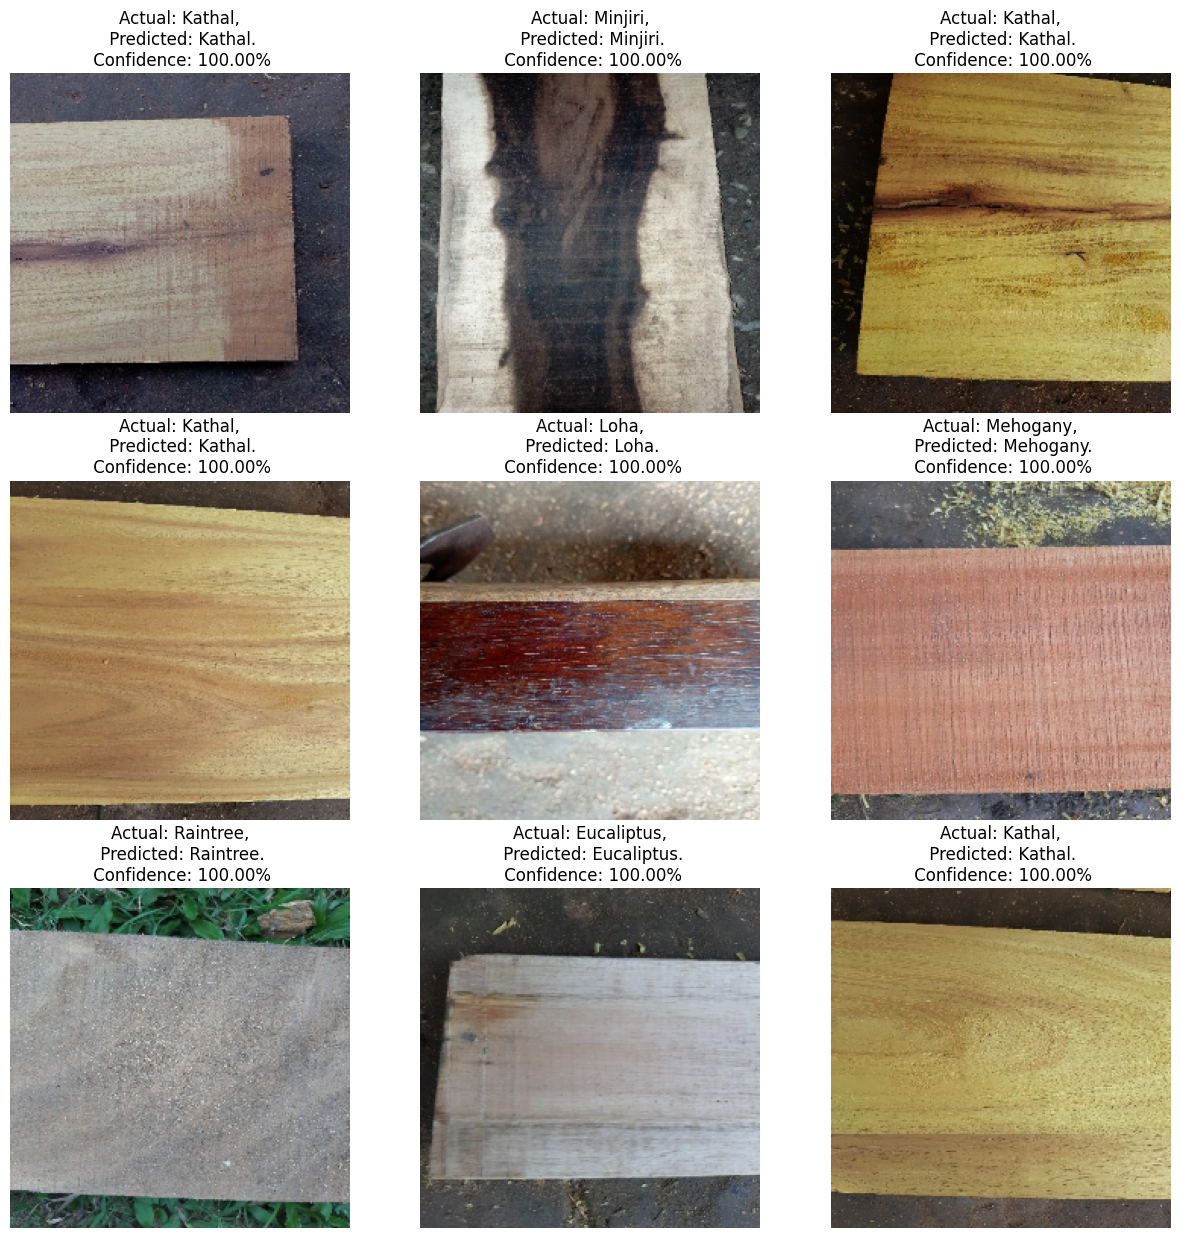

In [ ]:
import numpy as np

# Now you can use NumPy functions an
class_names = train_dataset.class_names

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence:.2f}%")
        plt.axis("off")

plt.show()

1/1 [==============================] - 0s 25ms/step


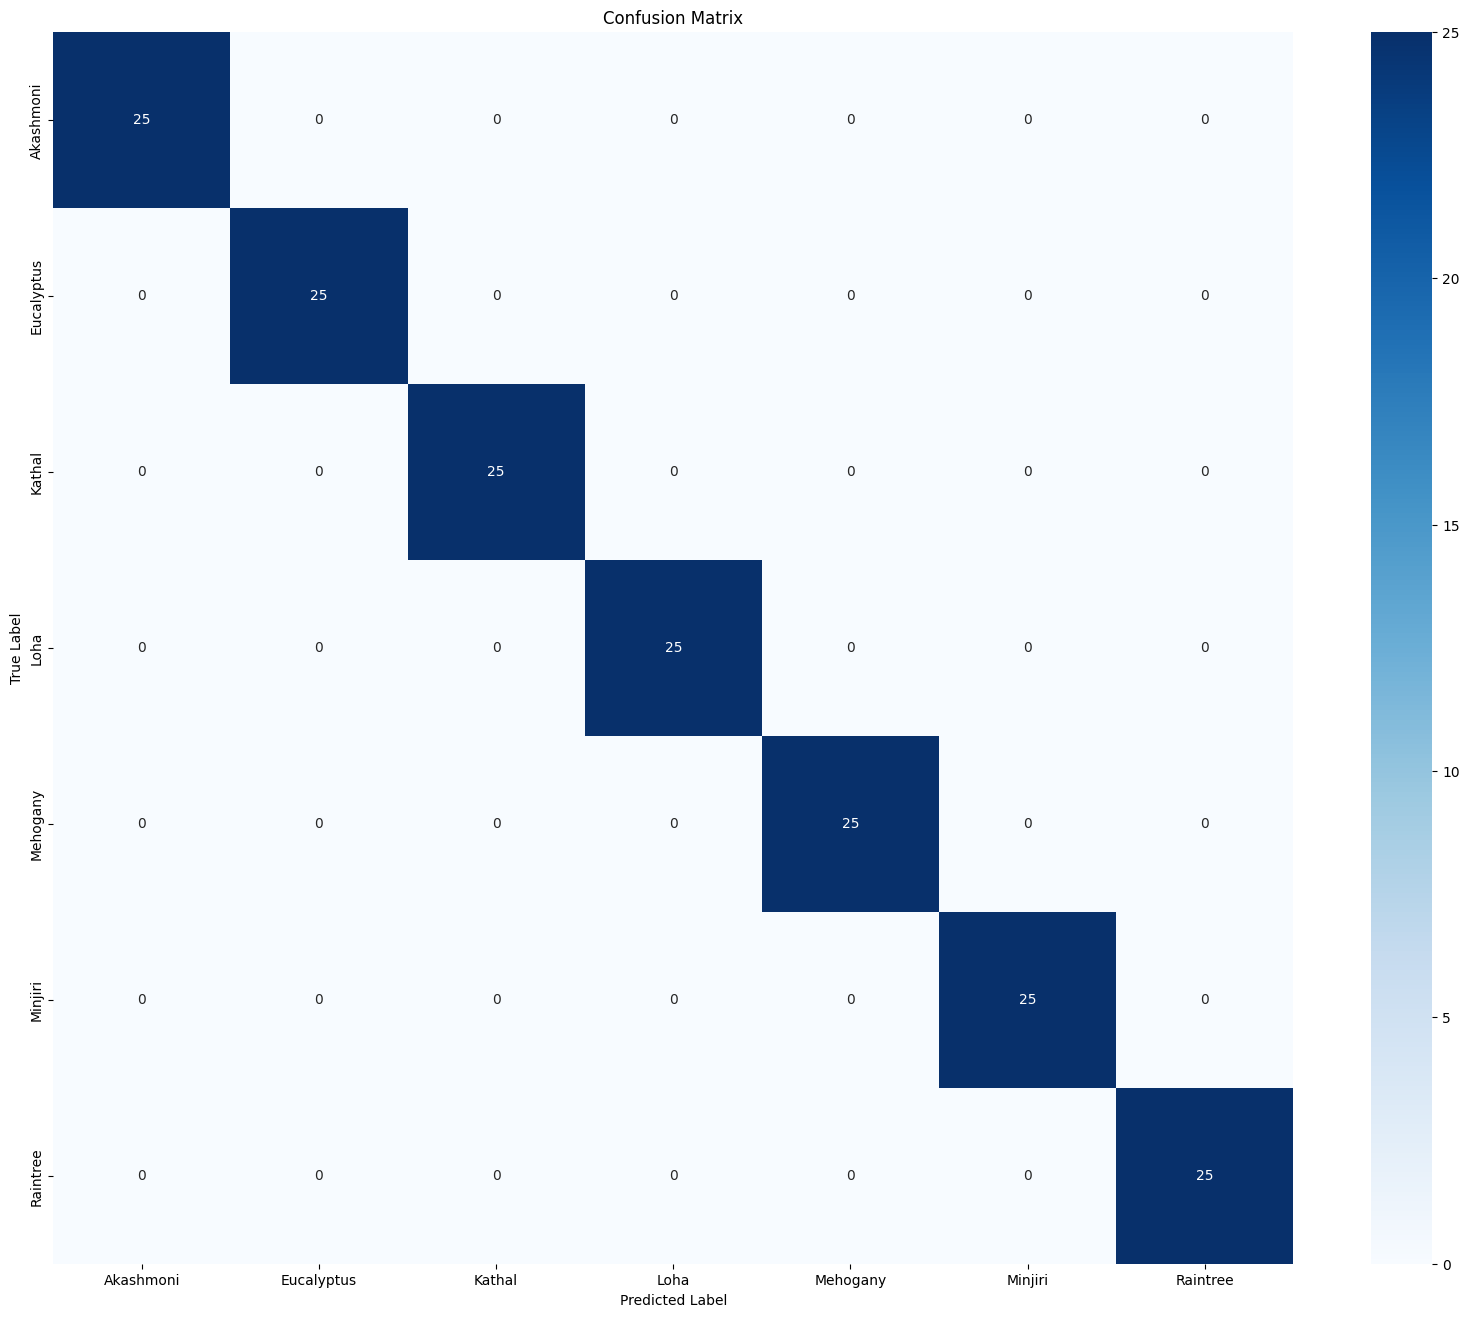

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace 'Class 0' and 'Class 1' with the actual class names from your dataset
class_names = test_dataset.class_names

# Create empty arrays to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to obtain true and predicted labels
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

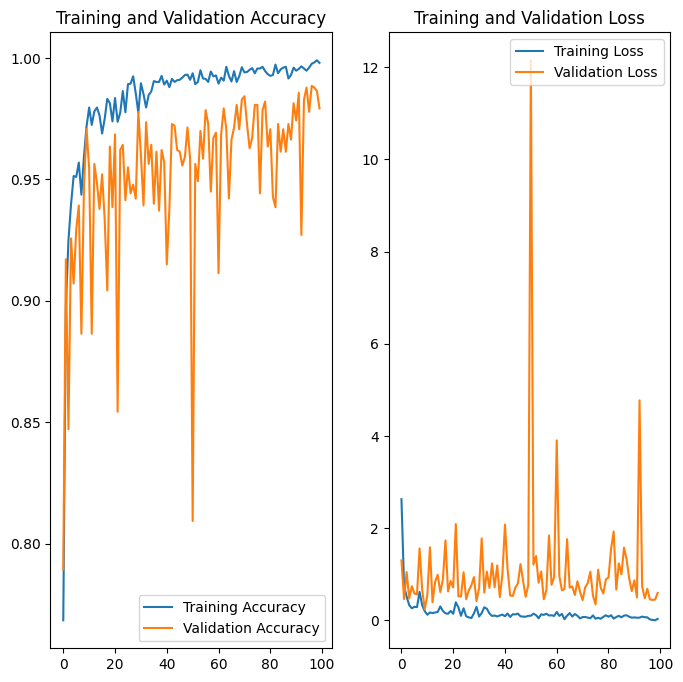

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'][:len(acc)]  # Truncate val_acc to match the length of acc
loss = history.history['loss']
val_loss = history.history['val_loss'][:len(loss)]  # Truncate val_loss to match the length of loss

# ... (continue with the rest of your code)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 0s 17ms/step
F1 Score: 0.9794052845266695
Precision: 0.9794985767066289
Recall: 0.9797743472485133
Macro ROC-AUC Score: 0.9985644749748043


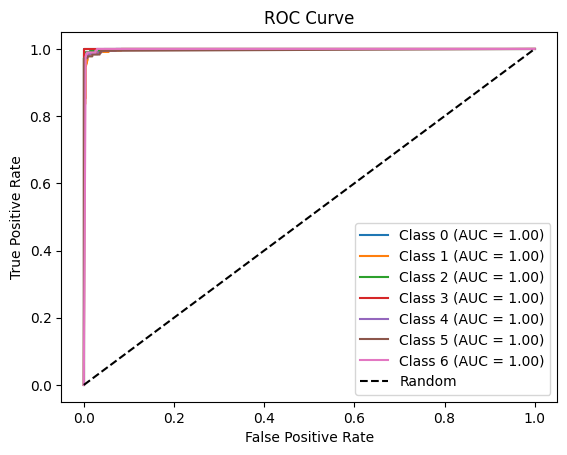

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# After model.fit(...)
validation_dataset = validation_dataset.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in validation_dataset:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, average='macro', multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Macro ROC-AUC Score: {roc_auc}")

# Plot ROC curves (only for binary classification or when using one-hot encoded labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
nb_classes = len(y_pred[0])
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(nb_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
